In [154]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [144]:
data = pd.read_excel('Data/full_data_2021-11-08.xlsx')
print(data.columns.values)

def fp_PCA(data:pd.DataFrame)
    n_comp = 10
    cols = []
    for c in data.columns:
        if 'afp' in c or 'bfp' in c or 'mfp' in c or 'efp' in c:
            cols.append(c)
    df = data[['Polymer'] +cols].dropna().drop_duplicates(subset = cols)
    pca = PCA(n_components = n_comp)
    pca.fit(df[cols])
    print('Explained variance (ratio): ' + str(pca.explained_variance_ratio_))
    print('Total variance in ' + str(n_comp) + ' components = ' + str(sum(pca.explained_variance_ratio_)))
    filtered = data.dropna(subset = cols).reset_index(drop = True)
    out = filtered[['Mw', 'Temperature', 'Shear_Rate','Melt_Viscosity', 'Polymer']].join(pd.DataFrame(pca.transform(filtered[cols])))
    return out, list(np.linspace(0,10-1,10).astype(int))

['INDEX' 'SAMPLE_ID' 'SMILES' 'Polymer' 'Mn' 'Mw' 'PDI' 'PDI (zw)'
 'Temperature' 'Shear_Rate' 'Frequency' 'Intrinsic Viscosity (dL/g)'
 'Melt_Viscosity' 'Source' 'Link' 'Method' 'index' 'Polymer_y'
 'afp_C4_C4_C4' 'afp_C4_C4_F1' 'afp_F1_C4_F1' 'bfp_299' 'bfp_304'
 'bfp_328' 'bfp_334' 'bfp_359' 'mfp_MQNs13' 'mfp_MQNs14' 'mfp_MQNs15'
 'mfp_MQNs16' 'mfp_MQNs17' 'mfp_MQNs18' 'mfp_MQNs19' 'mfp_MQNs20'
 'mfp_MQNs21' 'mfp_MQNs22' 'mfp_MQNs23' 'mfp_MQNs24' 'mfp_MQNs25'
 'mfp_MQNs26' 'mfp_MQNs27' 'mfp_MQNs28' 'mfp_MQNs29' 'mfp_MQNs30'
 'mfp_MQNs31' 'mfp_MQNs32' 'mfp_MQNs33' 'mfp_MQNs34' 'mfp_MQNs35'
 'mfp_MQNs36' 'mfp_MQNs37' 'mfp_MQNs38' 'mfp_MQNs39' 'mfp_MQNs40'
 'mfp_MQNs41' 'mfp_MQNs42' 'mfp_NumAromaticRings' 'mfp_NumAliphaticRings'
 'mfp_Chi0n' 'mfp_Chi0v' 'mfp_Chi1n' 'mfp_Chi1v' 'mfp_Chi2n' 'mfp_Chi2v'
 'mfp_tpsa' 'efp_numatoms_none_H' 'efp_norm_mol_wt' 'efp_main_chain_rel'
 'efp_side_chain_abs' 'efp_main_chain_ring' 'efp_4v_main' 'efp_4v_side'
 'efp_3v_main' 'efp_3v_side' 'efp_ring_dist

PCA(n_components=10)

In [147]:
print((pca.explained_variance_ratio_))

[0.34511932 0.1813519  0.10194128 0.06710149 0.05863391 0.03994611
 0.03556155 0.02749411 0.0209672  0.0158005 ]


In [148]:
comps = pd.DataFrame(pca.transform(df[cols]))
comps = comps.join(df['Polymer'].reset_index(drop = True))
colors = comps['Polymer'] == 'poly(pent-1-ene)'
colors[colors == False] = 'grey'
colors[colors == True] = 'r'

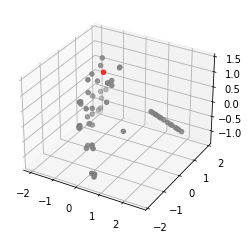

In [149]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(comps[0], comps[1], comps[2], c= colors)

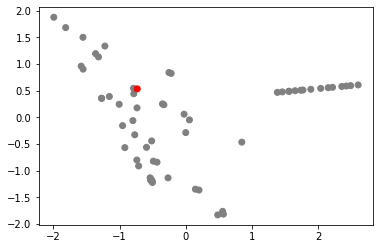

In [150]:
plt.scatter(comps[0], comps[1], c= colors)

,Mw,Temperature,Shear_Rate,Melt_Viscosity,Polymer,0,1,2,3,4,5,6,7,8,9
0,3900.0,200.0,0.000000,0.500000,poly(prop-1-ene),-0.78939,0.544235,1.395861,0.699218,-0.226599,-0.878079,-1.222811,-0.964717,1.723224,0.159295
1,17000.0,200.0,0.000000,5.000000,poly(prop-1-ene),-0.78939,0.544235,1.395861,0.699218,-0.226599,-0.878079,-1.222811,-0.964717,1.723224,0.159295
2,71000.0,200.0,0.000000,130.000000,poly(prop-1-ene),-0.78939,0.544235,1.395861,0.699218,-0.226599,-0.878079,-1.222811,-0.964717,1.723224,0.159295
3,103000.0,200.0,0.000000,500.000000,poly(prop-1-ene),-0.78939,0.544235,1.395861,0.699218,-0.226599,-0.878079,-1.222811,-0.964717,1.723224,0.159295
4,250000.0,200.0,0.000000,6000.000000,poly(prop-1-ene),-0.78939,0.544235,1.395861,0.699218,-0.226599,-0.878079,-1.222811,-0.964717,1.723224,0.159295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,34400.0,200.0,115.404361,124.812098,"poly(dodecano-12-lactam), PPTA",-0.50891,-1.193754,-0.037197,-0.871874,-0.546017,0.017791,-0.164861,0.056313,0.042733,0.017646
958,34400.0,200.0,192.506077,92.878339,"poly(dodecano-12-lactam), PPTA",-0.50891,-1.193754,-0.037197,-0.871874,-0.546017,0.017791,-0.164861,0.056313,0.042733,0.017646
959,34400.0,200.0,386.070543,56.755858,"poly(dodecano-12-lactam), PPTA",-0.50891,-1.193754,-0.037197,-0.871874,-0.546017,0.017791,-0.164861,0.056313,0.042733,0.017646
960,34400.0,200.0,575.439937,41.207215,"poly(dodecano-12-lactam), PPTA",-0.50891,-1.193754,-0.037197,-0.871874,-0.546017,0.017791,-0.164861,0.056313,0.042733,0.017646


In [164]:
list(np.linspace(0,10-1,10).astype(int))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]